# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [102]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

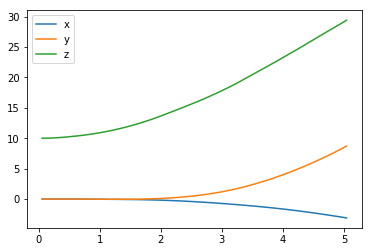

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

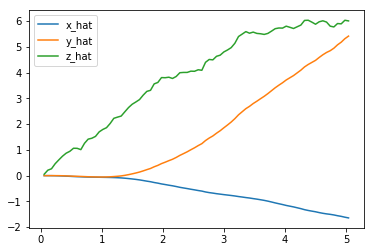

In [5]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

In [ ]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

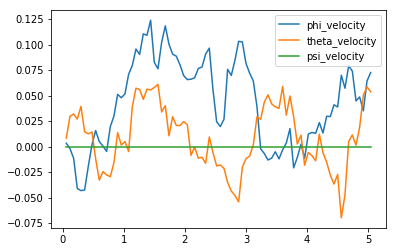

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

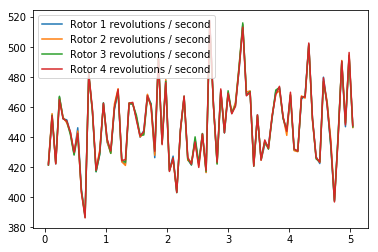

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[ -3.10003333   8.70272811  29.39758831   0.21717575   0.04674217   0.        ]
[-1.64224835  5.41919731  6.00934598]
[ 0.07262245  0.05371493  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [9]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 100.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score = -82.004 (best = -81.045), noise_scale = 3.25

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [445]:
%load_ext autoreload
%autoreload 2

import csv
import sys
import pandas as pd
from agents.agent import DDPG
from new_task import Task

runtime = 5.                                     # time limit of the episode
init_pose = np.array([50., 50., 50., 0., 0., 0.])  # initial pose
init_velocities = np.array([100., 100., 100.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities

num_episodes = 1000
target_pos = np.array([150., 150., 150.])
task = Task(init_pose, init_velocities, init_angle_velocities, runtime, target_pos=target_pos)
agent = DDPG(task) 
file_output = 'reward_log.txt'
# For reward
runlabels = ['episode', 'reward']
runresults = {x : [] for x in runlabels}
# For telemetry
labels = ['time', 'x', 'y', 'z', 'x_velocity',
          'y_velocity', 'z_velocity']
results = {x : [] for x in labels}
telemetry=[]
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    for i_episode in range(1, num_episodes+1):
        state = agent.reset_episode() # start a new episode
        score = 0 # Initialize score for each episode
        while True:
            action = agent.act(state) 
            next_state, reward, done = task.step(action)        
            agent.step(action, reward, next_state, done)
            score = reward
            state = next_state

            if done:
                print("\rEpisode = {:4d}, score = {}, loc = {}".format(
                    i_episode, score, task.sim.pose[:3]), end="")  # [debug]
                break
        sys.stdout.flush()
        to_write = [i_episode] + list(task.sim.pose[:3]) + list(task.sim.v)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        runresults['episode'].append(i_episode)
        runresults['reward'].append(score)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Episode = 1000, score = 3844.069990237619, loc = [ 146.10293642  150.          177.44307699]]

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

### DO NOT REMOVE FOR NOW SCRATCH WORK

I am trying to shape my reward function in this portion. Can be removed upon submission.

In [438]:
import numpy as np
# from new_task import Task

runtime = 5.                                     # time limit of the episode
init_pose = np.array([200., 200., 200., 0., 0., 0.])  # initial pose
init_velocities = np.array([100., 100., 10.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities

num_episodes = 100
target_pos = np.array([200., 200., 200.])

In [439]:
gap_ = np.sqrt((abs(init_pose[:3] - target_pos[:])**2).sum())
gap_

0.0

tanh(x) can be considered a step when x are all positive values (abs).

In [440]:
-10*np.tanh(gap_)

-0.0

In [441]:
res_vel = np.sqrt((abs(task.sim.v[:])**2).sum())

In [442]:
0.001*res_vel

0.35888844369324097

In [443]:
np.tanh(1000*(np.tanh(1/(0.00001+abs(init_pose[:3]-target_pos[:])))).sum())

1.0

In [444]:
-10*np.tanh(gap_) + 0.001*res_vel + (1000*(np.tanh(1/(0.00001+abs(init_pose[:3]-target_pos[:])))).sum())

3000.3588884436931

### End of scratch work

In [446]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(target_pos)
print(task.sim.pose[:3])
print(task.sim.v)
print(task.sim.angular_v)

[ 150.  150.  150.]
[ 146.10293642  150.          177.44307699]
[  5.86074977   9.37006842  29.99325207]
[-0.00631804  0.09954883  0.        ]


Text(0,0.5,'Reward')

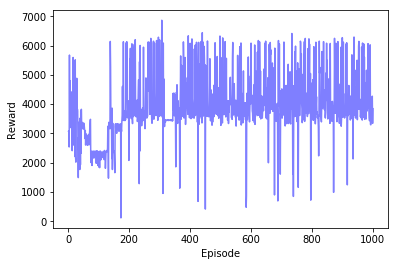

In [461]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(runresults['episode'],runresults['reward'],color = 'blue',alpha = 0.5, label ='reward')
plt.xlabel('Episode')
plt.ylabel('Reward')

In [448]:
#TODO: Create the graph to plot the training progress
import matplotlib.pyplot as plt
%matplotlib inline
def running_mean(x,N):
    cum_sum = np.cumsum(np.insert(x,0,0))
    # N here would be the range of the the moving average
    return (cum_sum[N:] - cum_sum[:-N]/N)


Text(0,0.5,'Reward')

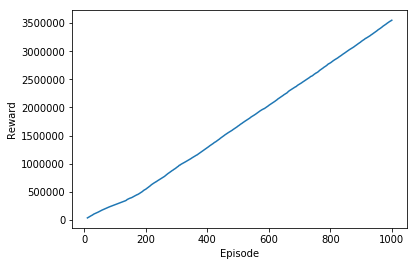

In [453]:
# eps, reward = np.array(runresults).T
moving_ave_reward = running_mean(runresults['reward'],10)
plt.plot(runresults['episode'][-len(moving_ave_reward):],moving_ave_reward)
# plt.plot(eps[-len(moving_ave_reward):],moving_ave_reward)
# plt.autoscale(enable=True, axis='both', tight=None)
# plt.plot(eps,reward, color = 'red', alpha = 0.3 )
plt.xlabel('Episode')
plt.ylabel('Reward')

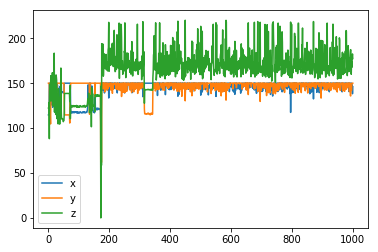

In [450]:
#NOTE: For displacements
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

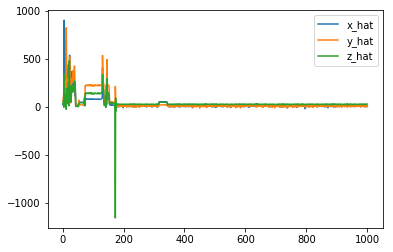

In [451]:
# NOTE: For velocity
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

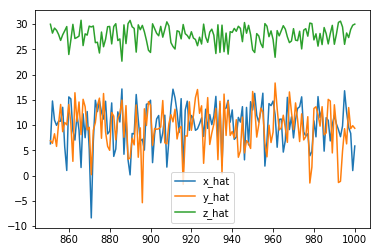

In [455]:
# NOTE: For velocity
plt.plot(results['time'][850:], results['x_velocity'][850:], label='x_hat')
plt.plot(results['time'][850:], results['y_velocity'][850:], label='y_hat')
plt.plot(results['time'][850:], results['z_velocity'][850:], label='z_hat')
plt.legend()
_ = plt.ylim()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

The idea I had for the task was that the agent will have to first move to the target coordinates and maintain that position. I tried to account for all axis of movements when designing the reward function so that the agent will be able to accomodate movements in x,y and z axis.

The reward function I used for the agent is seen below.

```python
reward = -10*np.tanh(.01*gap_) + 0.001*res_vel +  (1000*np.tanh(1/(0.00001+abs(self.sim.pose[:3]-self.target_pos[:])))).sum()
#NOTE:
gap_ = .01*np.sqrt((abs(self.sim.pose[:3] - self.target_pos[:])**2).sum())
# Resultant gap between the target and pos.
res_vel = np.sqrt((abs(self.sim.v[:])**2).sum())
# magnitude of the velocity
```

Its composed of 3 parts. The first one would be `-10*np.tanh(.01*gap_)` with `gap_ = .01*np.sqrt((abs(self.sim.pose[:3] - self.target_pos[:])**2).sum())`. So first up would be the `gap_` equation which is simply getting the resultant distance between the target positions and the current position. This would then be shaped by the hyperbolic tangent function so that the higher the distance the bigger the penalty would be for the agent. My idea behind it was that I wanted to have my agent take the shortest route possible (resultant) to get to the target to minimize the negative reward. Writing this right now and seeing the results, I think my idea makes sense but the way I engineered this one.

Next up would be `res_vel` which is supposed to be magnitude of the velocity between the three axes. This was the later addtition to the statement because I was running some trials using just displacement and coordinates in the reward function and what ended up happening was that there was no resulting velocity at all for the agent because it was not incentivized. For some reason, there was still movement on the agent basing on the results and I am thinking it was due to the acceleration variable. Since the quad was showing displacements in the range of 100's, I can only imagine how much acceleration was being forced to the quad since there was no initial velocity (since v was kepts 0 by the sim). I might be wrong in this. The reason for the small proportionality constant for the `res_vel` value is that I just want it to appear to the agent so that it would at least consider its velocity and not just accelerate blindly.

The final term for the reward function is a positive reward that should convince the quad to keep close to its target position. The idea behind it is that the quad should aim to have the distance between current position and target position as small as possible so that it can maximize the reward. One thing that I noticed here is that it constantly fluctuates the reward graph. This is due to the nature of the hyperbolic tangent function that was used to shape the term. If I am correct, I think the problem is due to the fact that the upper regions of the tanh function does not reflect scale very well. A small shift that will lead closer to the target value actually reflects to a large reward making it a bit difficult for the agent to get the idea. While it does look like it can show promise with more training, I am thinking there might be a better implementation for this.


**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

I settled to use the learning algorithm presented in the project module which is DDPG. I was reading up on it and found that it was a good fit for the current problem that was being presented. In the process of trying to figure out how the entire DDPG worked, I learned to implement DQN and A2C. Based on the resources I had, DDPG is a combination of PPO, DQN and Actor-Critic so I started to implement first the individual components before attempting to tackle the project directly. That way I was able to understand some more how each components/algorithm property fits. I did not attempt to implement A2C or DQN directly to the project. What I did was test them out in different environments, for exampe A2C in solving the CartPole environment and DQN for Taxi. In the process of implementing them, I get a general idea of how the components taken from each algorithm is used to build up the other until I was confident enought to attempt building the agent for the quad with DDPG.

I have a total of 5 hyperparameters for the algorithm. For the Ornstein-Uhlenbeck noise I have $\theta = 0.35$, $\mu = 0$ and $\sigma = 0.1$. I do have a question regarding the $\theta$ value. From what I understood from [this source](https://yanpanlau.github.io/2016/10/11/Torcs-Keras.html), $\mu$ is the measure of the mean. My question is, in the context of the quadcopter, what would have been the acceptable values and how does it affect training? If I understood correctly $\theta$ is the measure of volatility in a way that it measures how fast the value will return to the mean. $\sigma$ would be the measure of the range from the mean. So I am thinking, regression, mean and variance. Kindly correct me if I am wrong on this one. For the update function hyperparameters I have a $\gamma = 0.99$ and a $\tau = 0.001$. These are typical values for the two hyperparameters.

I had a total of 3 NN used for implementing the agent. Two for the critic and one for the actor class.

```python
# NOTE: For Critic portion
# First for the net_states
net_states = layers.Dense(units=32, activation='relu', kernel_initializer='he_uniform')(states)
net_states = layers.BatchNormalization()(net_states)
net_states = layers.Dense(units=64, activation='relu', kernel_initializer='he_uniform')(net_states)
 # network for actions
net_actions = layers.Dense(units=64, activation='relu', kernel_initializer='he_uniform')(actions)
# Merging of net_states and net_actions
net = layers.Add()([net_states,net_actions])
net = layers.Activation('relu')(net)
# Final Q_value node
Q_values = layers.Dense(units=1,name= 'q_values',kernel_initializer='he_uniform')(net)
```

For Critic, we have two paths that were later joined. I simply utilized the architecture from the original DDPG paper. It called for the actions to only be included in the 2nd hidden layer instead of having equal layers with the net states. They were they added/merged together before being used as input for the Q_values node.

```python
# NOTE: For Actor portion
states = layers.Input(shape =(self.state_size,),name = 'states')
net = layers.Dense(units = 32, activation='relu',kernel_initializer='he_uniform')(states)
net = layers.BatchNormalization()(net)
net = layers.Dense(units= 64, activation='relu',kernel_initializer='he_uniform')(net)
net = layers.BatchNormalization()(net)
net = layers.Dense(units=128, activation='relu',kernel_initializer='he_uniform'(net) raw_actions = layers.Dense(units=self.action_size, activation='sigmoid',name = 'raw_actions',kernel_initializer='he_uniform')(net)
```

For the actor protion we have a 3-layer deep network. The hidden layers were activated by relu and in between them were batch normalization layers. The resulting values of the final hidden layer was then used for the raw_actions and finally the actions layer which maps out to the control.

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

For the first point, I have two takes on it. First is that it is easy in a way that it should be expected behaviour for the quad to get to a point and maintain that position. It should be well within reason to wat a quadcopter to be able to go to a spot and stay there airborn. What makes is difficult is that there are a lot of small details that are required for the quad to make before it can do a supposedly simple taks we set it to do. It has to first actually get and maintain airborne. It has to learn how to move around. It has to be able to have a guage on its current position so as to know which direction to go. It has to be able to guage how much power is needed to move to the desired direction. All these small things add up to make a seemingly simple task very difficult to implement.

Based on the reward plot, initially the agent had difficulty getting its bearings. From the start to until ~100 episodes in, the agent was consistently getting a lower and lower reward value. Between ~100 to ~150 the agent started to stabilize, I am thinking it is now able to get a good idea of what each individual control does. From that point on until ~250 the agent was again getting the hang of flying towards its objective/task. Then around ~250 until the end of the training session, the agent was getting a reward near the ~3500 level although it looks like the values are consistently improving (based on the moving average graph) it just so happened that the agent is finding it difficult to actually get near its target. As we can see, the reward ranges from ~3500 to ~6000 in value which would mean that the agent will have a hard time figuring out the scale on which it's actions affect towards its goal. I believe this was due to my choice of shaping for the reward function. In terms of moving average, the reward plot seems to indicate that the reward is actually increasing on average. This would mean that the agent is still learning. It just so happened that the resulting shift in rewards from a small shift of distance between target and current position is not proportional so the agent is having a hard time figuring it out.

If I may add, I think that the agent did well in maitining its target in terms of x and y location. From the x,y,z plot, it looks like after episode 200, the agent was able to figure out that 150 is the target and made little deviations from there. It was in the z-axis that the quad was having a problem. Its shifts in z axis led to a disproportionate reward result making it difficutly for the agent to actually learn how to close the gap between the z target and z position coordinate.

For the velocity graph, we can see that at the early stages of training, the agent actually produced "improbable" velocity values. Getting the velocity to as high as ~800 to as low as -1000 is quite difficult to comprehend. Although, given that it is in its early stages of learning, its understandable that the quad will play around a bit throwing seemingly excessive and random values. Plotting the velocities from episode 850 to the end showed that the velocities tend to fall within a certain range for x and y. For z, I am thinking that the increased velocity was used to compensate for the required lift to maintain the altitude.

Writing up these answers, I already have some more ideas that I am thinking off that might improve the performance of the agent but I want to submit the project initially so that I can get feedback and inputs for the project and for the issues that I encountered.

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:
One hard part of the project was actually getting to first understand how the individual components of the DDPG algorithm and implementing them so that I will be able to apply it to the quadcopter project. Another difficult part of the project was in specifying the task. It might seem straight forward and we might go for an expected behaviour for our agent but as I have said before, sometimes even the simplest task in our head can quickly get complicated in the translation.

Based on the graphs, I am seeing some values for velocity that are difficult to generate in real life. I mentioned in the first part that I did not incentivize the velocity and looking at the physics simulator, the only variable left that might lead to a change in position would have been acceleration so I can only imagine how much stress the quadcopter would have generated trying to move with zero velocity. It just shows that even in simulating the quadcopter, there would be a high number of parameters to look out for. Reading up on the `physics_sim.py` shows that there are a lot of parameters that can be measured and shaped in a way that will make the behaviour of our quadcopter more desireable. It just shows how __AMAZING__ trying to implement the agent is. Even the simplest problems actually make you think hard to resolve. I had an idea of a smoothly operating quadcopter but thinking about the reward function to come up with that and the training it will take, I think I still have a long way to go.